### Student Information
Name: 林育丞

Student ID: 112062595

GitHub ID: ryonaya

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# First part : Take home exercises

### Pre-setup for Exercises

In [18]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

import seaborn as sns
import plotly.graph_objs as go
import numpy as np

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

from sklearn.manifold import TSNE
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


### Exercise 2 (take home):

In [ ]:
X.loc[:10, [t for t in X.columns]]

### Exercise 5 (take home)

Answer here <br>
```markdown
np.nan, None, missing column are considered as null values 
'NaN', 'None' are valid entries but displayed like np.nan and None
'' empty string is valid and display nothing

### Exercise 6 (take home):

Answer here
```markdown
The entries are randomly drawn from the original dataset
It's a subset of the original dataset
The index is not ordered

### Exercise 8 (take home):

In [ ]:
# Answer here
# comparison of X and X_sample in the same plot, using different colors
fig, ax = plt.subplots()
X_sample = X.sample(n=1000) #random state
upper_bound = X.category_name.value_counts().max() + 35

X.category_name.value_counts().plot(kind = 'bar', 
                                    color='skyblue', 
                                    ax = ax, 
                                    width = 0.2, 
                                    position = 1, 
                                    title = 'Category distribution', 
                                    ylim = [0, upper_bound], 
                                    rot = 0, fontsize = 11, figsize = (8,3))
X_sample.category_name.value_counts().plot(kind = 'bar', 
                                           color='orange', 
                                           ax = ax, 
                                           width = 0.2, 
                                           position = 0, 
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 11, figsize = (8,3))


### Exercise 10 (take home):

In [ ]:
# find the index of the second 1 in the fifth record
for i in range(1, 100):
    # print(f'{i}: {X_counts[4, i]}, means {count_vect.get_feature_names_out()[i]}')
    if X_counts[4, i] == 1:
        print(count_vect.get_feature_names_out()[i])
        break

### Exercise 11 (take home):

In [ ]:
my_count_vect = CountVectorizer(max_features = 20)
my_X_counts = my_count_vect.fit_transform(X.text[0:20])
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

# first twenty features only
my_plot_x = [str(i) for i in my_count_vect.get_feature_names_out()]
my_plot_z = my_X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

# print top 20 terms
# print(my_plot_x)

df_todraw = pd.DataFrame(my_plot_z, columns = my_plot_x, index = plot_y)
top_freq_value = df_todraw.values.max() * 0.75
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=top_freq_value, annot=True)

### Exercise 12 (take home):

In [ ]:
trace = go.Histogram(x = count_vect.get_feature_names_out()[:300], y = term_frequencies[:300])
data = [trace]
layout = go.Layout(title = 'Term Frequency distribution')
fig = go.Figure(data = data, layout = layout)
fig.show()

### Exercise 13 (take home):

In [ ]:
x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

# plot the sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)

### Exercise 14 (take home):

In [ ]:
x = [x[0] for x in sorted_paired_values[:30]]
y = [y[1] for y in sorted_paired_values[:30]]

trace = go.Bar(x = x, y = y)
data = [trace]
layout = go.Layout(title = 'Term Frequency distribution')
fig = go.Figure(data = data, layout = layout)
fig.show()

### Exercise 15 (take home):

In [ ]:
# The plot is way more smoothed out, the values are not as extreme as before

# The log operation can be used to scale down the differences between the values, 
# making it easier to compare them if the distribution is too skewed.

# sort term frequencies with the feature names
paired_values = list(zip(count_vect.get_feature_names_out(), term_frequencies_log))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

# plot the sorted term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)

### Exercise 16 (take home):

In [ ]:
# Answer here

# Since most of the less frequent words are not very meaningful (000000, 00011, etc.),
# and the most frequent words are not very informative (the, you, me, etc.),
# I decided to filter them out. (top 0.003, bottom 0.98)

# The rest of the words are more meaningful to the domain.
# I collected some of the more representative words from the filtered list.

# comp.graphics
#   Contains: science, unix, information, systems, problem, video, bit, 16, 128, work, algorithm, etc.

# soc.religion.christian
#   Contains: law, mary, catholic, religion, christianity, jewish, eternal, paul, etc.

# sci.med
#   Contains: program, sci, blood, intellect, mail, medicine, cancer, treatment, keyboard, etc.

# alt.atheism
#   Contains: morality, caltech, fact, allan, christian, human, political, world, moral, etc.

### Exercise 17 (take home):

<p>
1. More k or less minSup will increase the runtime, and the pattern found.<br>
2. The runtime doesn't grow linearly when both value changes, it's more like exponential.<br>
3. For TopK, top patterns are mostly single word, latter patterns are longer sentence.<br>
4. For MaxFPGrowth, most patterns are single word or short sentence.<br>
</p>

In [2]:
from PAMI.frequentPattern.topk import FAE as alg
k_values = [500, 1000, 1500]
for k in k_values:
    obj = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    obj.mine()
    frequentPatternsDF_comp_graphics = obj.getPatternsAsDataFrame()
    print(f'FAETopK Patterns for comp.graphics with k={k}:')
    print(frequentPatternsDF_comp_graphics)
    print(f'Runtime: {obj.getRuntime()}')
    print()
    obj.save(f'FAETopK_comp_graphics_{k}.txt')
    
# k = 500
# [500 rows x 2 columns]
# Runtime: 0.6093358993530273

# k = 1000
# [1000 rows x 2 columns]
# Runtime: 1.3153412342071533

# k = 1500
# [1500 rows x 2 columns]
# Runtime: 2.809460163116455

 TopK frequent patterns were successfully generated using FAE algorithm.
FAETopK Patterns for comp.graphics with k=500:
                                              Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]
Runtime: 0.6093358993530273

 TopK frequent patterns were successfully generated using F

In [1]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSup_values = [9, 6, 3]
for minSup in minSup_values:
    obj = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF_comp_graphics = obj.getPatternsAsDataFrame()
    print(f'MaxFPGrowth Patterns for comp.graphics with minSup={minSup}:')
    print(frequentPatternsDF_comp_graphics)
    print(f'Runtime: {obj.getRuntime()}')
    print()
    obj.save(f'MaxFPGrowth_comp_graphics_{minSup}.txt')

# minSup = 9
# [660 rows x 2 columns]
# Runtime: 0.06646871566772461

# minSup = 6
# [1340 rows x 2 columns]
# Runtime: 0.212599515914917

# minSup = 3
# [6872 rows x 2 columns]
# Runtime: 12.917818307876587

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth Patterns for comp.graphics with minSup=9:
                 Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]
Runtime: 0.06646871566772461

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth Patterns for comp.graphics with minSup=6:
                                 Patterns  Support
0                              tim brock         6
1                                   face         6
2                                 pardon         6
3     removal silent assassin cellar tsa      

### Exercise 18 (take home):

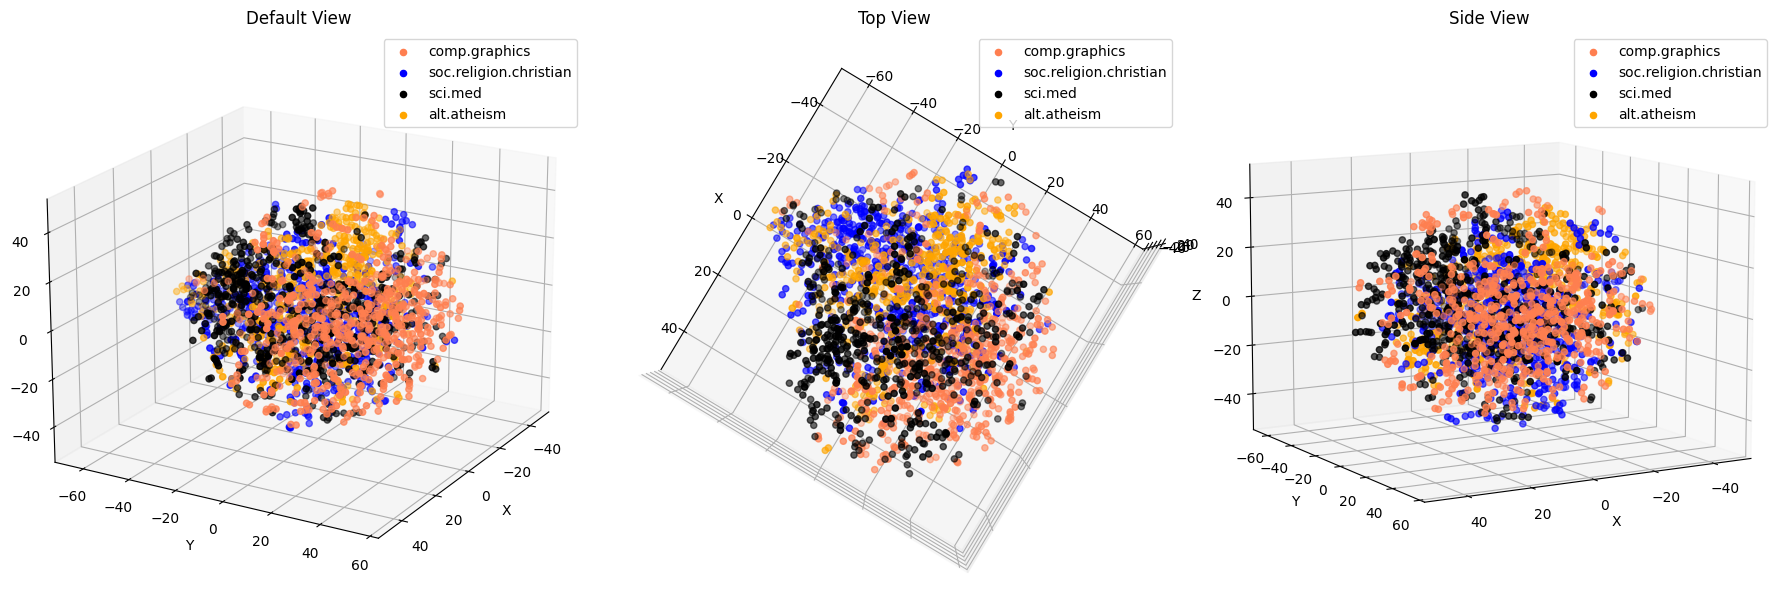

In [16]:
# Answer here

# Although they aren't very separated, we can still somewhat see the clusters.
# Dots of the same color tend to be a bit closer to each other.

X_tsne_aug = TSNE(n_components=3).fit_transform(tdm_df.values)
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(18, 6))

# Define a function to create a scatter plot for each method
def plot_scatter_3D(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
        
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)
    
plot_scatter_3D(fig.add_subplot(131, projection='3d'), X_tsne_aug, 'Default View', 20, 30)
plot_scatter_3D(fig.add_subplot(132, projection='3d'), X_tsne_aug, 'Top View', 90, 30)
plot_scatter_3D(fig.add_subplot(133, projection='3d'), X_tsne_aug, 'Side View', 10, 60)

# Show the plot
plt.tight_layout()
plt.show()

### Exercise 19 (take home):

In [20]:
# need to re-fit the label binarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist() 
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### Exercise 20 (take home):

In [ ]:
# Actually there's no Exercise 20.

# Second part : New dataset and stuff

### 1. The Data
### 2. Data Preparation
### 3. Data Transformation

In [44]:
# Load data 
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['nostalgia', 'not nostalgia']
new_X = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
new_X['sentiment_name'] = new_X['sentiment']
new_X['sentiment'] = new_X['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

# tokenize the text
import nltk
nltk.download('punkt_tab')
new_X['unigrams'] = new_X['comment'].apply(lambda x: dmh.tokenize_text(x))

import matplotlib.pyplot as plt
%matplotlib inline

# Count Vectorizer related
from sklearn.feature_extraction.text import CountVectorizer
new_count_vect = CountVectorizer()
new_X_counts = new_count_vect.fit_transform(new_X.comment) #learn the vocabulary and return document-term matrix

# Term Frequency related
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

new_term_frequencies = np.asarray(new_X_counts.sum(axis=0))[0]

# sort term frequencies with the feature names
new_paired_values = list(zip(new_count_vect.get_feature_names_out(), new_term_frequencies))
new_sorted_paired_values = sorted(new_paired_values, key=lambda x: x[1], reverse=True)

import math
new_term_frequencies_log = [math.log(i) for i in new_term_frequencies]

# TDM related
from sklearn.manifold import TSNE
new_terms = new_count_vect.get_feature_names_out()  # Original terms in the vocabulary
new_X_tdm = new_count_vect.fit_transform(new_X['comment'])  # X['text'] contains your text data
new_tdm_df = pd.DataFrame(new_X_tdm.toarray(), columns=new_terms, index=new_X.index)

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


In [29]:
print(new_X.loc[:5, [t for t in new_X.columns]])
print(new_X[new_X['sentiment'] == 1].iloc[::10][:5])

   sentiment                                            comment sentiment_name
0          0  He was a singer with a golden voice that I lov...  not nostalgia
1          1  The mist beautiful voice ever I listened to hi...      nostalgia
2          1  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3          0  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4          1  listening to his songs reminds me of my mum wh...      nostalgia
5          1  Every time I heard this song as a child, I use...      nostalgia
    sentiment                                            comment  \
1           1  The mist beautiful voice ever I listened to hi...   
18          1  My Grandparents had a pub in the 1970's, this ...   
32          1  I remember my Mom listening to Jim over and ov...   
50          1  If I remember correctly, this song came out af...   
71          1  Gosh does this bring back memories. Nearly eve...   

   sentiment_name  
1       nostalgia 

### 4. Data Mining using Pandas

In [38]:
print("Total data : ", new_X.shape)
print(new_X.isnull().apply(lambda x: dmh.check_missing_values(x)))
print("Number of duplicated records: ", new_X.duplicated().sum())
# no null, 1 duplicated

new_X.drop_duplicates(inplace=True)
new_X.reset_index(drop=True, inplace=True)

print("\nTotal data : ", new_X.shape)

Total data :  (1499, 3)
                            sentiment                             comment  \
0  The amount of missing records is:   The amount of missing records is:    
1                                   0                                   0   

                       sentiment_name  
0  The amount of missing records is:   
1                                   0  
Number of duplicated records:  0

Total data :  (1499, 3)


### 5. Data Preprocessing

#### 5.1 Sampling and plotting

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment_name'>

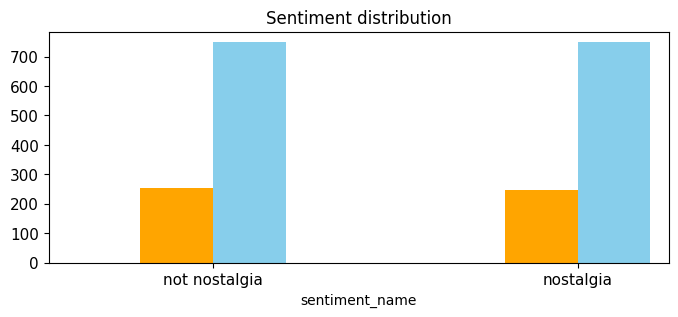

In [42]:
new_X_sample = new_X.sample(n=500) #random state
upper_bound = new_X.sentiment_name.value_counts().max() + 35

fig, ax = plt.subplots()
new_X.sentiment_name.value_counts().plot(kind = 'bar',
                                         title='Sentiment distribution',
                                         color='skyblue',
                                         ax=ax, 
                                         width=0.2,
                                         position=0,
                                         ylim = [0, upper_bound],
                                         rot = 0, fontsize = 11, figsize = (8,3))

new_X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                            color='orange',
                                            ax=ax, 
                                            width=0.2,
                                            position=1,
                                            ylim = [0, upper_bound],
                                            rot = 0, fontsize = 11, figsize = (8,3))

#### 5.2 & 5.3, Feature creation + subset selection

In [53]:
# The tokenization process is done in the pre-setup.
print(new_X[:5]['unigrams'], end='\n\n')

# The count vectorizer is also done in the pre-setup.
print(new_X_counts[0], end='\n\n')
print("Feature ID 1595 is : " + new_count_vect.get_feature_names_out()[1598], end='\n\n')

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1

Feature ID 1595 is : he



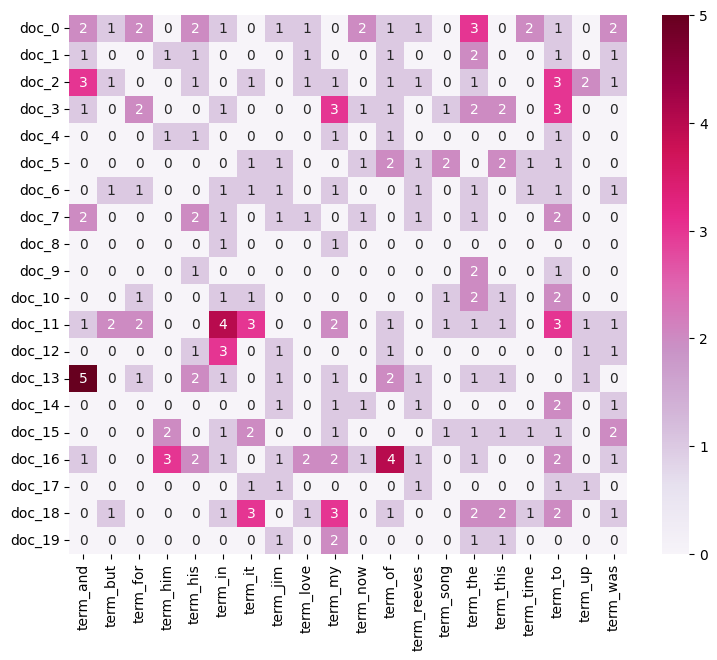

In [57]:
# Heatmap (take-home version)
my_count_vect = CountVectorizer(max_features = 20)
my_X_counts = my_count_vect.fit_transform(new_X.comment[0:20])

plot_x = ["term_"+str(i) for i in my_count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(new_X.index)[0:20]]
plot_z = my_X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
top_freq_value = df_todraw.values.max()
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=top_freq_value, annot=True)

#### 5.4 Attribute Transformation / Aggregation

[Text(0, 0, 'the'),
 Text(1, 0, 'this'),
 Text(2, 0, 'to'),
 Text(3, 0, 'and'),
 Text(4, 0, 'my'),
 Text(5, 0, 'song'),
 Text(6, 0, 'of'),
 Text(7, 0, 'in'),
 Text(8, 0, 'it'),
 Text(9, 0, 'was'),
 Text(10, 0, 'me'),
 Text(11, 0, 'is'),
 Text(12, 0, 'you'),
 Text(13, 0, 'that'),
 Text(14, 0, 'so'),
 Text(15, 0, 'love'),
 Text(16, 0, 'when'),
 Text(17, 0, 'back'),
 Text(18, 0, 'for'),
 Text(19, 0, 'music'),
 Text(20, 0, 'memories'),
 Text(21, 0, 'on'),
 Text(22, 0, 'with'),
 Text(23, 0, 'time'),
 Text(24, 0, 'great'),
 Text(25, 0, 'but'),
 Text(26, 0, 'have'),
 Text(27, 0, 'years'),
 Text(28, 0, 'all'),
 Text(29, 0, 'he'),
 Text(30, 0, 'beautiful'),
 Text(31, 0, 'as'),
 Text(32, 0, 'like'),
 Text(33, 0, 'one'),
 Text(34, 0, 'songs'),
 Text(35, 0, 'old'),
 Text(36, 0, 'just'),
 Text(37, 0, 'her'),
 Text(38, 0, 'we'),
 Text(39, 0, 'she'),
 Text(40, 0, 'at'),
 Text(41, 0, 'be'),
 Text(42, 0, 'from'),
 Text(43, 0, 'good'),
 Text(44, 0, 'voice'),
 Text(45, 0, 'what'),
 Text(46, 0, 'not'),
 T

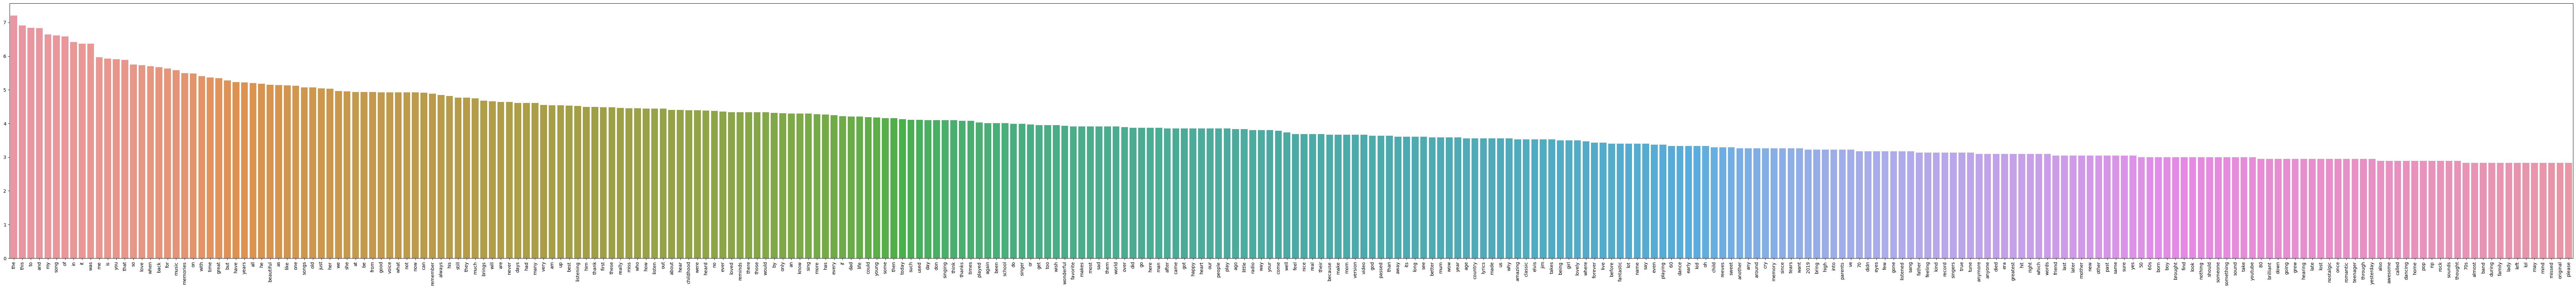

In [59]:
# Top 300 term frequency (log) distribution
paired_values = list(zip(new_count_vect.get_feature_names_out(), new_term_frequencies_log))
sorted_paired_values = sorted(paired_values, key=lambda x: x[1], reverse=True)

x = [x[0] for x in sorted_paired_values[:300]]
y = [y[1] for y in sorted_paired_values[:300]]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90)

#### PAMI

In [60]:
#Create separate DataFrames for each category
categories = new_X['sentiment_name'].unique()  # Get unique categories
category_dfs = {}  # Dictionary to store DataFrames for each category
for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = new_X[new_X['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Fit and transform the data
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category
for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

Create .csv files (take couple seconds to run)

In [61]:
from PAMI.extras.DF2DB import DenseFormatDF as db
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Some .mine() functions here.

In [62]:
from PAMI.frequentPattern.topk import FAE as alg
k_values = [300]
for k in k_values:
    obj = alg.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    obj.mine()
    frequentPatternsDF_nostalgia = obj.getPatternsAsDataFrame()
    print(f'FAETopK Patterns for nostalgia with k={k}:')
    print(frequentPatternsDF_nostalgia)
    print(f'Runtime: {obj.getRuntime()}')
    print()
    obj.save(f'FAETopK_nostalgia_{k}.txt')

 TopK frequent patterns were successfully generated using FAE algorithm.
FAETopK Patterns for nostalgia with k=300:
        Patterns  Support
0           this      412
1             my      400
2            the      369
3             to      358
4           song      353
..           ...      ...
295    and my me       76
296     the that       76
297  and song of       76
298      me when       76
299       was on       75

[300 rows x 2 columns]
Runtime: 0.16450738906860352



#### 5.5 Dimensionality Reduction

Took ~1 minute to run

In [63]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

new_X_pca_tdm = PCA(n_components=2).fit_transform(new_tdm_df.values)
new_X_tsne_tdm = TSNE(n_components=2).fit_transform(new_tdm_df.values)
new_X_umap_tdm = umap.UMAP(n_components=2).fit_transform(new_tdm_df.values)

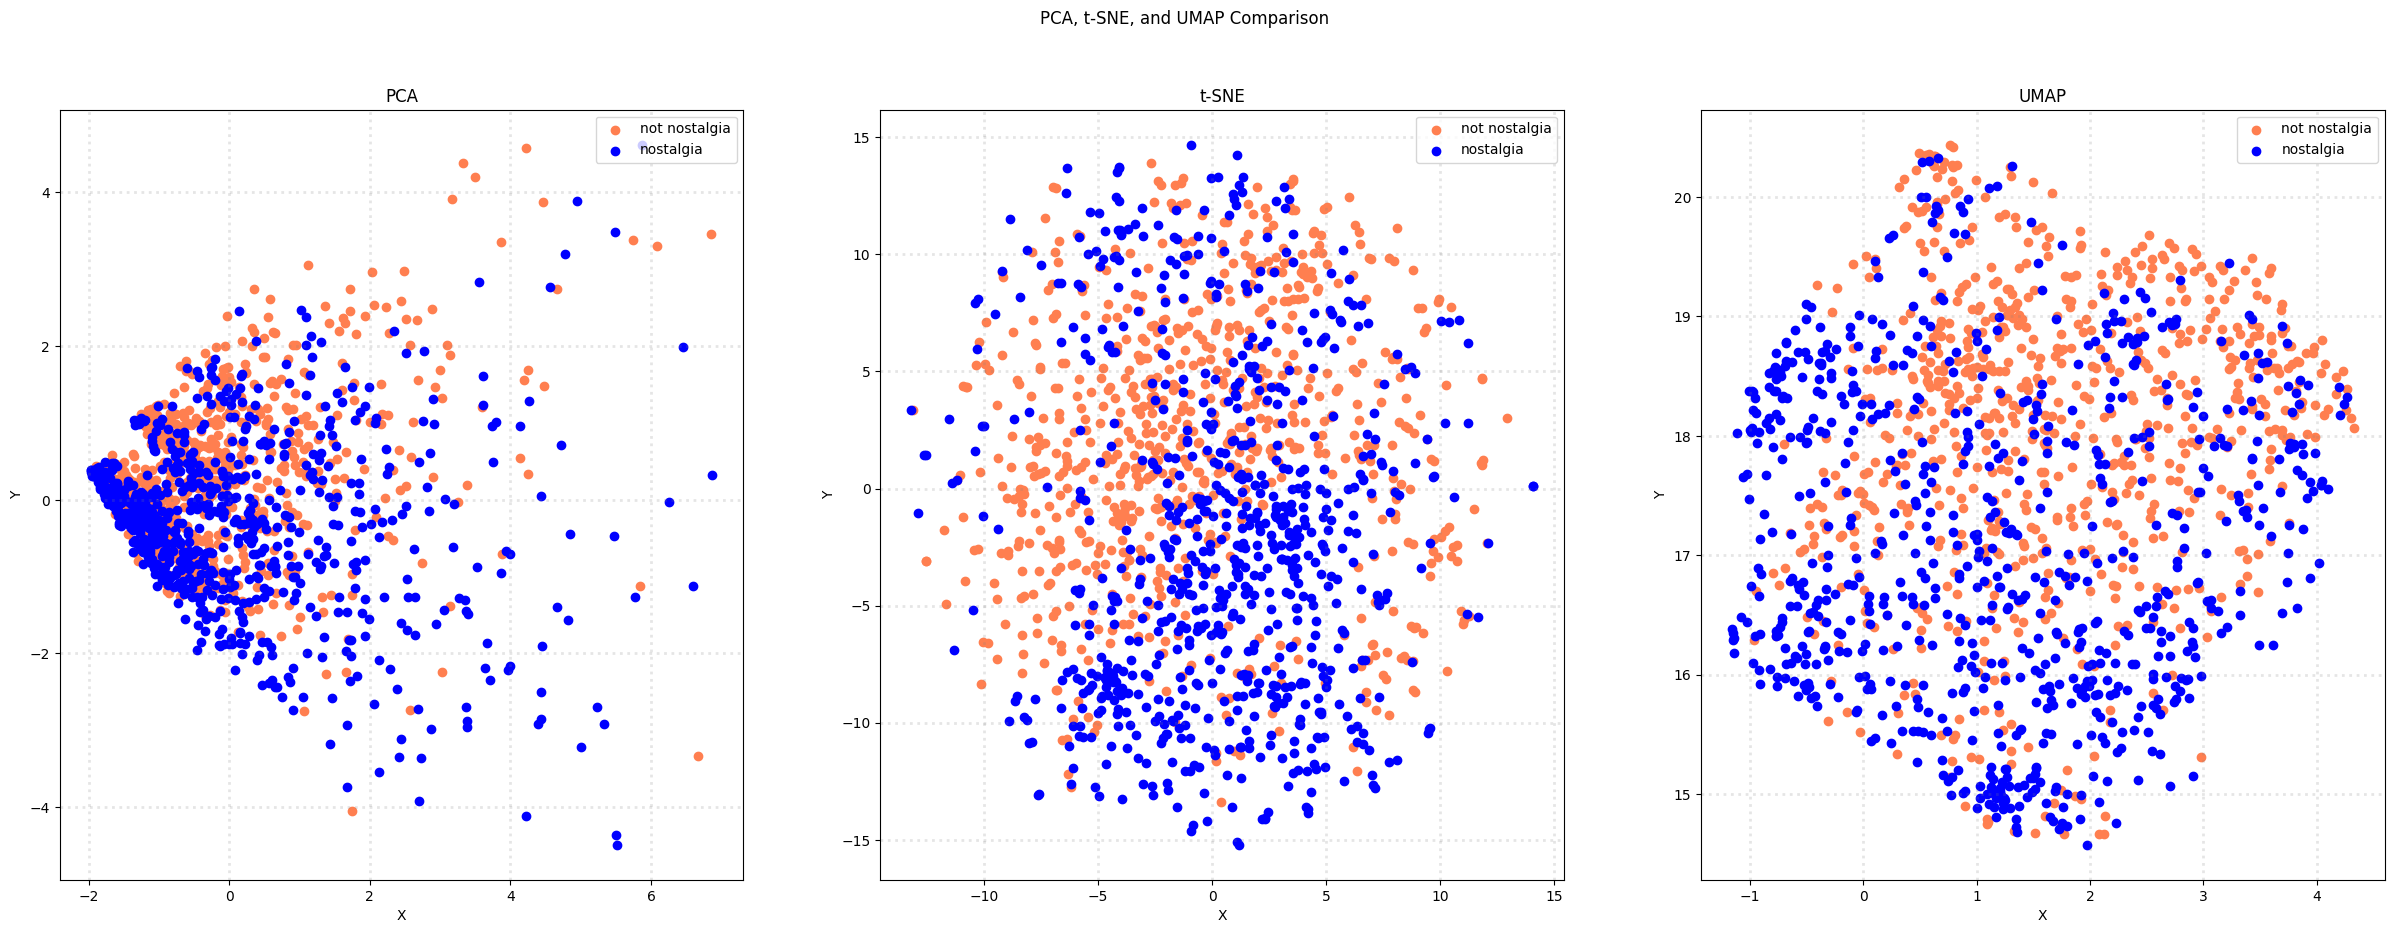

In [65]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = new_X['sentiment_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[new_X['sentiment_name'] == category].T[0]
        ys = X_reduced[new_X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], new_X_pca_tdm, 'PCA')
plot_scatter(axes[1], new_X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], new_X_umap_tdm, 'UMAP')

plt.show()

#### 5.6 Discretization and Binarization

In [67]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(new_X.sentiment_name)
new_X['bin_sentiment_name'] = mlb.transform(new_X['sentiment_name']).tolist()
new_X[0:9]

,sentiment,comment,sentiment_name,unigrams,bin_sentiment_name
0,0,He was a singer with a golden voice that I lov...,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t...",[1]
1,1,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene...",[0]
2,1,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw...",[0]
3,0,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na...",[1]
4,1,listening to his songs reminds me of my mum wh...,nostalgia,"[listening, to, his, songs, reminds, me, of, m...",[0]
5,1,"Every time I heard this song as a child, I use...",nostalgia,"[Every, time, I, heard, this, song, as, a, chi...",[0]
6,1,"My dad loved listening to Jim Reeves, when I w...",nostalgia,"[My, dad, loved, listening, to, Jim, Reeves, ,...",[0]
7,1,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...",[0]
8,0,Wherever you are you always in my heart,not nostalgia,"[Wherever, you, are, you, always, in, my, heart]",[1]


### 6. Data Exploration

Cosine similarity

In [71]:
document_to_transform_1 = [new_X.iloc[50]['comment']]
document_to_transform_2 = [new_X.iloc[100]['comment']]
document_to_transform_3 = [new_X.iloc[150]['comment']]
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### 7. Data Classification

In [81]:
#Model with only the document-term frequency data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(new_tdm_df, new_X['sentiment'], test_size=0.3, random_state=42)

In [84]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred, target_names=categories, digits=4))

# Skip augmentation, as it will sure boost the accuracy, and we already know that.

Accuracy:  0.8422222222222222

Classification Report: 
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



# Third part : Perform specific tasks on new dataset

In [21]:
# TODO : some sort of codes


# Fourth part : Inefficent parts and improvements

Code below is just for getting the ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'] list, it is too complicated for the simple functionality. 

And it's also defined in the first cell.


In [ ]:
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# THE categories defined in the first cell.
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

There's five "import pandas as pd" in the master notebook, and two "import matplotlib.pyplot as plt". 

For educational purpose it's fine, as it can also remind students the relevant library. But it would be better to put all the import in the first cell, and leave some comments for the library usage.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

A little bit more simplicity could be better, but again, I can understand that some students might not be as proficient in Python.

In [ ]:
# We retrieve 3 sentences for a random record
# document_to_transform_1 = []
# random_record_1 = X.iloc[50]
# random_record_1 = random_record_1['text']
# document_to_transform_1.append(random_record_1)

# document_to_transform_2 = []
# random_record_2 = X.iloc[100]
# random_record_2 = random_record_2['text']
# document_to_transform_2.append(random_record_2)

# document_to_transform_3 = []
# random_record_3 = X.iloc[150]
# random_record_3 = random_record_3['text']
# document_to_transform_3.append(random_record_3)

# ... equal to the following ...

document_to_transform_1 = [X.iloc[50]['text']]
document_to_transform_2 = [X.iloc[100]['text']]
document_to_transform_3 = [X.iloc[150]['text']]

# ... or define a function to reduce redundancy and keep the steps unchanged ...

# Fifth part : Tidy up my notebook

I mean they are already tidy, right?